In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
pd.set_option("display.max_columns",100)

In [2]:
## Proxy settings when using cntlm
http_proxy  = "http://localhost:3128"
https_proxy = "https://localhost:3128"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
            }
proxyDict = None

In [3]:
mapping = {
    'Richmond': 'richmond',
    'West Coast': 'westcoast',
    'Sydney': 'swans',
    'Adelaide': 'adelaide',
    'Geelong': 'geelong',
    'Greater Western Sydney': 'gws',
    'Melbourne': 'melbourne',
    'Port Adelaide': 'padelaide',
    'Collingwood': 'collingwood',
    'Hawthorn': 'hawthorn',
    'Essendon': 'essendon',
    'Western Bulldogs': 'bullldogs',
    'St Kilda': 'stkilda',
    'North Melbourne': 'kangaroos',
    'Kangaroos' : 'kangaroos',
    'Fremantle': 'fremantle',
    'Brisbane Lions': 'brisbanel',
    'Gold Coast': 'goldcoast',
    'Carlton': 'carlton'
}

In [ ]:
from data_prep.team_history import History
team_df = History(mapping, proxyDict).generate_team_history()

In [ ]:
History(mapping, proxyDict).generate_game_data('training-all/', team_df)
History(mapping, proxyDict).generate_game_data_ha('training-hva/', team_df)

In [42]:
X_list = []
y_list = []

for i in range(1,16):
#     if i not in [3,6,7,8]: # remove 2016,2013,2012,2011
    X = np.concatenate([
        np.load('training-all/training-'+str(2019-i)+'.npy'),
        np.load('training-hva/training-'+str(2019-i)+'.npy')[:,1:] #remove the rnd column
                ], axis=1)
    mask = np.isnan(X).any(axis=1)
    index = np.where(mask==True)[0][0] ## X8 has a row containing nulls
    X = np.delete(X, index, 0)
    X_list.append(X)

    y = np.load('training-all/results-'+str(2019-i)+'.npy')
    y = np.delete(y, index, 0)
    y_list.append(y)
    
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(X.shape)
print(y.shape)

print('Wins vs losses',np.sum(y)/float(len(y)))

(2789, 33)
(2789,)
Wins vs losses 0.577626389386877


In [43]:
from data_prep.feature_eng import Features
training_cols = Features().training_cols()
pd.DataFrame(Features().div_cols(X_list[0]), columns=training_cols).head()

,Rnd,h_F_mean,h_F_std,h_A_mean,h_A_std,h_M_mean,h_M_std,h_W_sum,h_perc,a_F_mean,a_F_std,a_A_mean,a_A_std,a_M_mean,a_M_std,a_W_sum,a_perc,h_F_mean_hva,h_F_std_hva,h_A_mean_hva,h_A_std_hva,h_M_mean_hva,h_M_std_hva,h_W_sum_hva,h_perc_hva,a_F_mean_hva,a_F_std_hva,a_A_mean_hva,a_A_std_hva,a_M_mean_hva,a_M_std_hva,a_W_sum_hva,a_perc_hva,F_mean,F_std,A_mean,A_std,M_mean,M_std,W_sum,perc,F_mean_hva,F_std_hva,A_mean_hva,A_std_hva,M_mean_hva,M_std_hva,W_sum_hva,perc_hva
0,3.0,101.500000,0.000000,106.500000,0.000000,-5.000000,0.000000,1.0,0.953052,109.500000,0.000000,92.000000,0.000000,17.500000,0.000000,2.0,1.190217,121.00,0.000000,95.0,0.000000,26.00,0.000000,0.0,1.273684,118.000000,0.000000,117.000000,0.000000,1.000000,0.000000,0.0,1.008547,0.926941,1.025424,0.000000,0.000000,1.157609,0.811966,0.000000,0.000000,-0.285714,26.000000,0.000000,0.000000,0.500000,0.000000,0.800737,1.262890
1,4.0,101.666667,27.577164,100.666667,16.263456,1.000000,16.263456,2.0,1.009934,82.666667,5.656854,101.333333,4.949747,-18.666667,4.949747,0.0,0.815789,111.50,0.000000,92.0,0.000000,19.50,0.000000,2.0,1.211957,87.000000,0.000000,102.000000,0.000000,-15.000000,0.000000,0.0,0.852941,1.229839,1.281609,4.875000,0.000000,0.993421,0.901961,3.285714,0.000000,-0.053571,-1.300000,3.285714,0.000000,0.000000,0.000000,1.237983,1.420915
2,7.0,105.000000,14.275854,74.166667,39.274674,30.833333,39.274674,5.0,1.415730,83.666667,26.780590,82.166667,21.335417,1.500000,21.335417,3.0,1.018256,111.00,13.435029,67.0,4.242641,44.00,4.242641,3.0,1.656716,69.000000,25.455844,86.666667,29.698485,-17.666667,29.698485,1.0,0.796154,1.254980,1.608696,0.533067,0.527778,0.902637,0.773077,1.840821,0.142857,20.555556,-2.490566,1.840821,0.142857,1.666667,3.000000,1.390349,2.080900
3,10.0,100.555556,14.169888,75.555556,33.070272,25.000000,33.070272,7.0,1.330882,65.111111,19.455076,93.444444,11.624328,-28.333333,11.624328,2.0,0.696790,110.75,9.539392,58.5,43.405069,52.25,43.405069,4.0,1.893162,53.000000,7.000000,94.000000,7.023769,-41.000000,7.023769,0.0,0.563830,1.544369,2.089623,0.728339,1.362770,0.808561,0.622340,2.844919,6.179740,-0.882353,-1.274390,2.844919,6.179740,3.500000,0.000000,1.910021,3.357684
4,15.0,97.307692,18.372410,72.076923,32.980251,25.230769,32.980251,10.0,1.350053,88.307692,19.942341,70.230769,15.023214,18.076923,15.023214,10.0,1.257393,109.60,7.804913,62.2,39.306488,47.40,39.306488,5.0,1.762058,93.166667,17.672012,68.166667,13.935566,25.000000,13.935566,6.0,1.366748,1.101916,1.176386,0.921276,0.441654,1.026287,0.912469,2.195286,2.820588,1.395745,1.896000,2.195286,2.820588,1.000000,0.833333,1.073692,1.289234


In [ ]:
from training.training import Training
Training(50, 65).train(X_list, y_list)

Interrupting!
Season 2018
Bayes CV search took 7.65 seconds for 50 candidates parameter settings.
val. score: 66.85034890767076
test score: 26.04779536224933
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.7769115900139626,
       colsample_bynode=0.12953003411010086,
       colsample_bytree=0.17714429798092454, gamma=0,
       learning_rate=0.028680448385152265, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=283, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.19542027703869053, reg_lambda=0.7285954159368625,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.10597699210128961)

Interrupting!
Season 2017
Bayes CV search took 2.39 seconds for 50 candidates parameter settings.
val. score: 66.48768260054484
test score: 10.030569388528312
XGBClassifier(base_score=0.57574568288854, booster='gbtree',
       colsample_bylevel=0.4413131759124075,
   

In [49]:
def averagingImp(models=[]):
    predictions = np.column_stack([
        model.feature_importances_ for model in models
    ])
    return np.mean(predictions, axis=1)

imp = pd.DataFrame(data=averagingImp(best_models),
             index=training_cols, 
             columns=['importance']).sort_values(by=['importance'], ascending=False)
imp.iloc[:10,:]

,importance
W_sum_hva,0.049328
M_mean,0.039885
perc_hva,0.036358
M_mean_hva,0.035771
F_mean,0.033839
M_std,0.033577
h_M_mean,0.032085
h_perc,0.029295
h_A_mean,0.028742
a_M_mean,0.028151


In [50]:
def averagingModels(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return np.mean(predictions, axis=1)

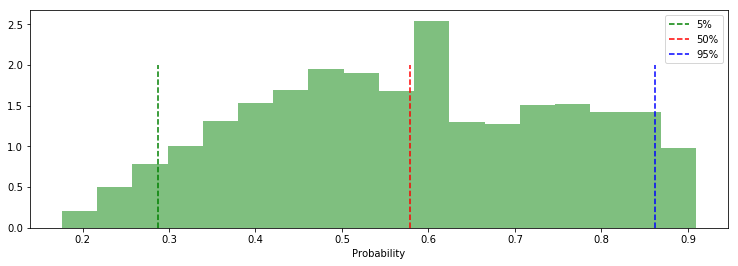

In [51]:
plt.figure(figsize=(12.5,4))
line_height = 2
data = averagingModels(X_train,best_models)
x = plt.hist(data, bins='auto', density=True, facecolor='green', alpha=0.5)

plt.vlines(np.percentile(data, 5), 0, line_height, linestyle="--", colors='green', label="5%")
plt.vlines(np.percentile(data, 50), 0, line_height, linestyle="--", colors='red', label="50%")
plt.vlines(np.percentile(data, 95), 0, line_height, linestyle="--", colors='blue', label="95%")
plt.xlabel('Probability')
plt.legend()

In [52]:
rows = []
for model in best_models:
    rows.append(model.get_params())
pd.DataFrame(rows)

,base_score,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_delta_step,max_depth,min_child_weight,missing,n_estimators,n_jobs,nthread,objective,random_state,reg_alpha,reg_lambda,scale_pos_weight,seed,silent,subsample
0,0.575746,gbtree,0.680524,0.451782,0.447147,0,0.028247,0,3,1,None,100,-1,None,binary:logistic,0,0.519922,0.585741,1,None,True,0.313918
1,0.575746,gbtree,0.454218,0.268137,0.978430,0,0.019809,0,5,1,None,141,-1,None,binary:logistic,0,0.962804,0.898282,1,None,True,0.957945
2,0.575746,gbtree,0.553358,0.100000,0.851059,0,0.021332,0,3,1,None,201,-1,None,binary:logistic,0,0.879758,0.888103,1,None,True,0.160439
3,0.575746,gbtree,0.107928,0.190706,0.592649,0,0.036763,0,4,1,None,130,-1,None,binary:logistic,0,0.735182,0.392457,1,None,True,0.535468
4,0.575746,gbtree,0.305340,0.641205,0.599234,0,0.010123,0,3,1,None,395,-1,None,binary:logistic,0,0.210949,0.478085,1,None,True,0.716786
5,0.575746,gbtree,0.526666,0.100000,0.279787,0,0.011277,0,5,1,None,306,-1,None,binary:logistic,0,0.000000,0.175568,1,None,True,0.108579
6,0.575746,gbtree,0.926885,0.100000,0.922799,0,0.013320,0,3,1,None,187,-1,None,binary:logistic,0,0.695967,0.600300,1,None,True,0.100000
7,0.575746,gbtree,0.299203,0.223769,0.520360,0,0.012589,0,3,1,None,368,-1,None,binary:logistic,0,0.750903,0.905496,1,None,True,0.102233
8,0.575746,gbtree,0.708440,0.270919,0.677547,0,0.008973,0,4,1,None,337,-1,None,binary:logistic,0,0.856258,0.009805,1,None,True,0.412864
9,0.575746,gbtree,1.000000,0.258166,0.440758,0,0.007214,0,4,1,None,342,-1,None,binary:logistic,0,0.467363,0.354359,1,None,True,0.840542


## Scoring

In [17]:
from data_prep.web_scraping import Scrape

games = []
start = 110
for i in range(start,start+9):
    games.append(Scrape(mapping, proxyDict).scrape_game(i))
games

/Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py:35: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 35 of the file /Users/d719674/dev/code/AFL-Monash-comp/data_prep/web_scraping.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(r.text, "html")


[['Sydney', 'Collingwood'],
 ['Hawthorn', 'Port Adelaide'],
 ['Western Bulldogs', 'North Melbourne'],
 ['Adelaide', 'West Coast'],
 ['Gold Coast', 'Geelong'],
 ['Richmond', 'Essendon'],
 ['Melbourne', 'Greater Western Sydney'],
 ['St Kilda', 'Carlton'],
 ['Fremantle', 'Brisbane Lions']]

In [18]:
from data_prep.scoring import Scoring
scoring = Scoring(mapping, proxyDict).score_data(games)

In [19]:
from data_prep.feature_eng import Features
scoring_enr = Features().div_cols(scoring)

In [53]:
def modelStats(X, models=[]):
    predictions = np.column_stack([
        model.predict_proba(X)[:,1] for model in models
    ])
    return [np.mean(predictions, axis=1), np.median(predictions, axis=1), np.std(predictions, axis=1), 
            np.max(predictions, axis=1), np.min(predictions, axis=1)]
arr = np.c_[ games, modelStats(scoring_enr,best_models)[0],
           modelStats(scoring_enr,best_models)[1],modelStats(scoring_enr,best_models)[2],
            modelStats(scoring_enr,best_models)[3], modelStats(scoring_enr,best_models)[4]] 
pd.DataFrame(arr,columns=['home','away','prob_avg', 'prob_med', 'prob_std', 'prob_max', 'prob_min'])

,home,away,prob_avg,prob_med,prob_std,prob_max,prob_min
0,Sydney,Collingwood,0.36563626,0.36634937,0.026151553,0.41000614,0.30985445
1,Hawthorn,Port Adelaide,0.55493045,0.54920745,0.025378436,0.60855323,0.50598794
2,Western Bulldogs,North Melbourne,0.7655727,0.7679378,0.02065708,0.801389,0.7212015
3,Adelaide,West Coast,0.6487142,0.6538974,0.027225422,0.6912513,0.59796065
4,Gold Coast,Geelong,0.38297558,0.37539524,0.031649,0.4444556,0.3305094
5,Richmond,Essendon,0.64548874,0.65625054,0.027971305,0.69787747,0.5867932
6,Melbourne,Greater Western Sydney,0.3152276,0.30426827,0.031621356,0.38042012,0.27615812
7,St Kilda,Carlton,0.6620133,0.65932333,0.028806102,0.7092106,0.6114993
8,Fremantle,Brisbane Lions,0.6193788,0.61204815,0.02519435,0.6671486,0.56915736


## Save models

In [150]:
from joblib import dump
for i in range(len(best_models)):
    dump(best_models[i], 'models/model'+str(i)+'.joblib') 

## Load models

In [156]:
from joblib import load
best_models = []
for i in range(15):
    best_models.append(load('models/model'+str(i)+'.joblib'))